# Q1: Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd

In [3]:
# Load the dataset
data = pd.read_csv('C:/Users/choub/Downloads/credit_card - credit_card.csv')

In [4]:
# Display summary statistics
summary = data.describe()
print(summary)


            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

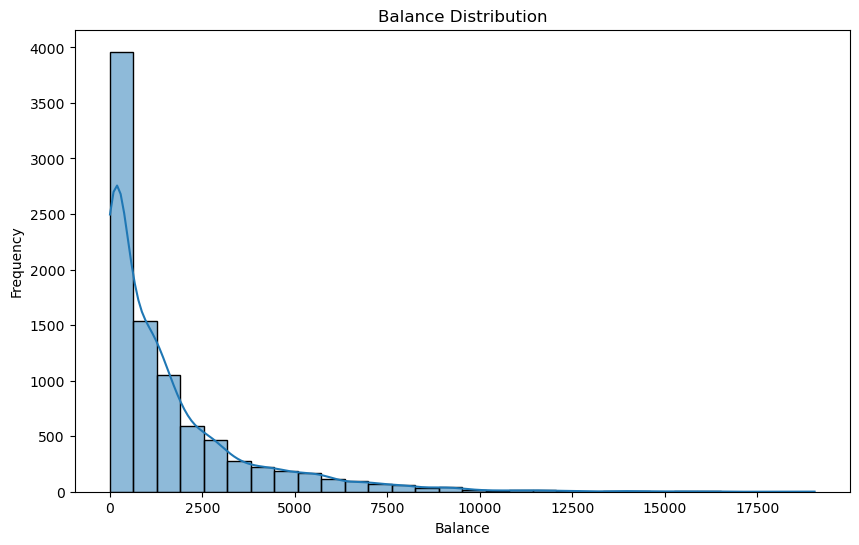

In [6]:
# Visualizing Balance Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['BALANCE'], bins=30, kde=True)
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

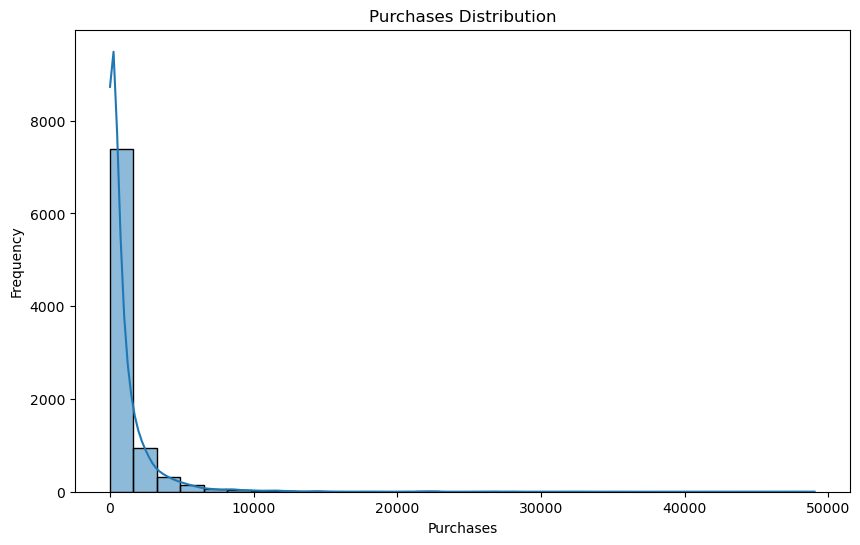

In [7]:
# Visualizing Purchases Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['PURCHASES'], bins=30, kde=True)
plt.title('Purchases Distribution')
plt.xlabel('Purchases')
plt.ylabel('Frequency')
plt.show()

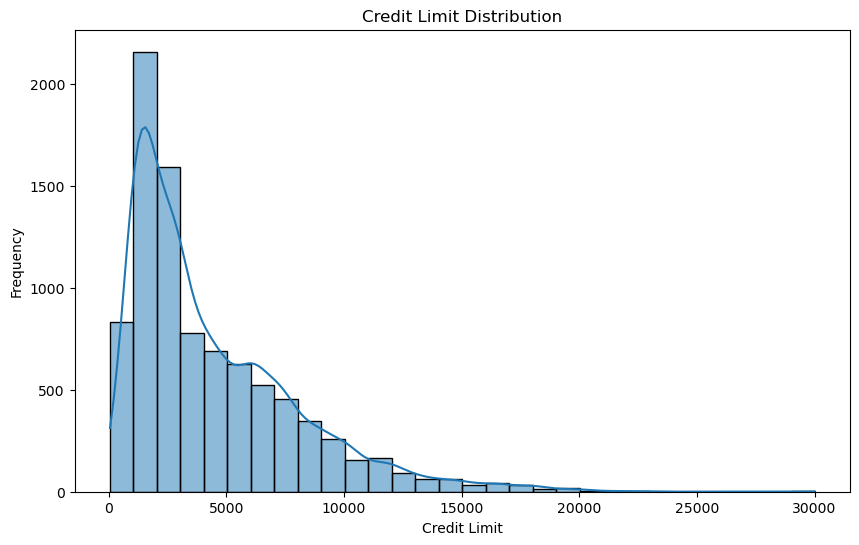

In [8]:
# Visualizing Credit Limit Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['CREDIT_LIMIT'], bins=30, kde=True)
plt.title('Credit Limit Distribution')
plt.xlabel('Credit Limit')
plt.ylabel('Frequency')
plt.show()

# Q2: Exploratory Data Analysis Tasks

A. Missing Value Analysis

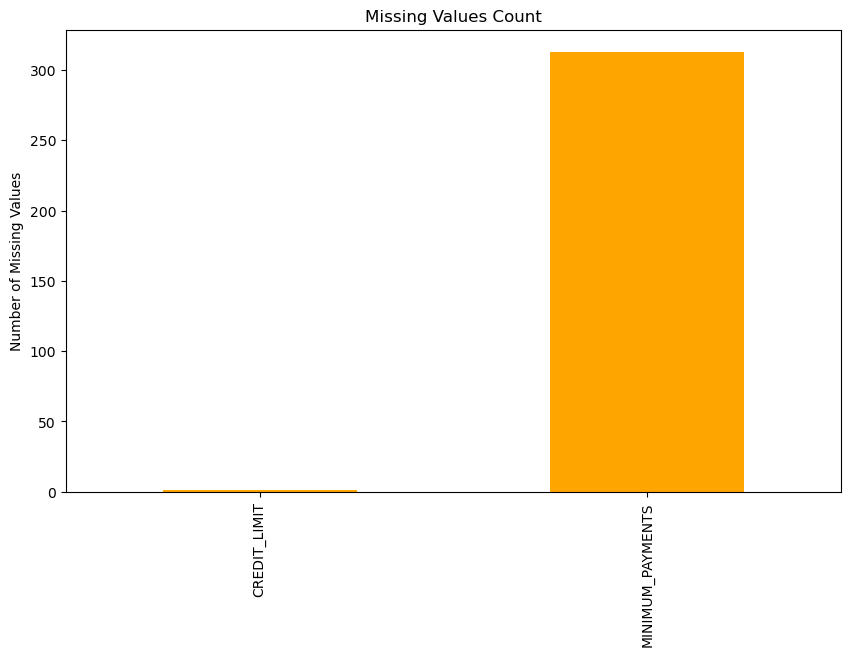

In [10]:
# Check for missing values
missing_values = data.isnull().sum()

# Plot missing values
missing_values[missing_values > 0].plot(kind='bar', figsize=(10, 6), color='orange', title='Missing Values Count')
plt.ylabel('Number of Missing Values')
plt.show()

In [14]:
# Identify numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

In [15]:
# Check for missing values in numeric columns
missing_values = data[numeric_cols].isnull().sum()
print("Missing values in numeric columns:\n", missing_values[missing_values > 0])

Missing values in numeric columns:
 Series([], dtype: int64)


In [16]:
# Fill missing values with the median for numeric columns only
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Verify that there are no more missing values
missing_values_after = data[numeric_cols].isnull().sum()
print("Missing values after filling:\n", missing_values_after[missing_values_after > 0])

Missing values after filling:
 Series([], dtype: int64)


B. Outlier Treatment Using Z-score Method

In [17]:
from scipy import stats
import numpy as np

In [18]:
# Calculate Z-scores for numerical columns
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))

In [19]:
# Set a threshold for identifying outliers (Z-score > 3)
outliers = (z_scores > 3).any(axis=1)

# Remove outliers from the dataset
data_cleaned = data[~outliers]

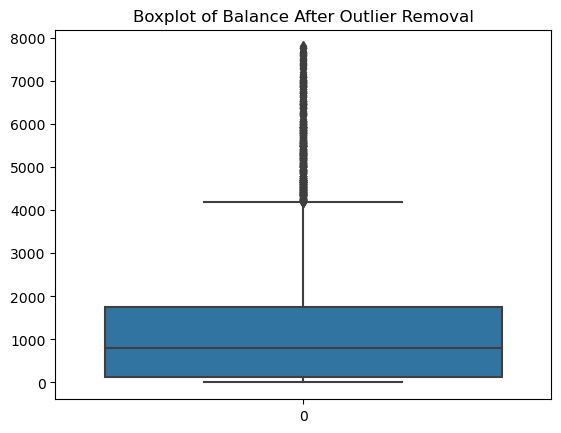

In [20]:
# Visualize Balance after outlier removal
sns.boxplot(data=data_cleaned['BALANCE'])
plt.title('Boxplot of Balance After Outlier Removal')
plt.show()

C. Correlation Analysis and Handling Correlated Variables

In [25]:
# Calculate correlation matrix using only numeric columns
correlation_matrix = data[numeric_cols].corr()

In [27]:
# Print the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                                    BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.322412   0.181261   
BALANCE_FREQUENCY                 0.322412           1.000000   0.133674   
PURCHASES                         0.181261           0.133674   1.000000   
ONEOFF_PURCHASES                  0.164350           0.104323   0.916845   
INSTALLMENTS_PURCHASES            0.126469           0.124292   0.679896   
CASH_ADVANCE                      0.496692           0.099388  -0.051474   
PURCHASES_FREQUENCY              -0.077944           0.229715   0.393017   
ONEOFF_PURCHASES_FREQUENCY        0.073166           0.202415   0.498430   
PURCHASES_INSTALLMENTS_FREQUENCY -0.063186           0.176079   0.315567   
CASH_ADVANCE_FREQUENCY            0.449218           0.191873  -0.120143   
CASH_ADVANCE_TRX                  0.385152           0.141555  -0.067175   
PURCHASES_TRX                     0.154338           0.189626   0.6

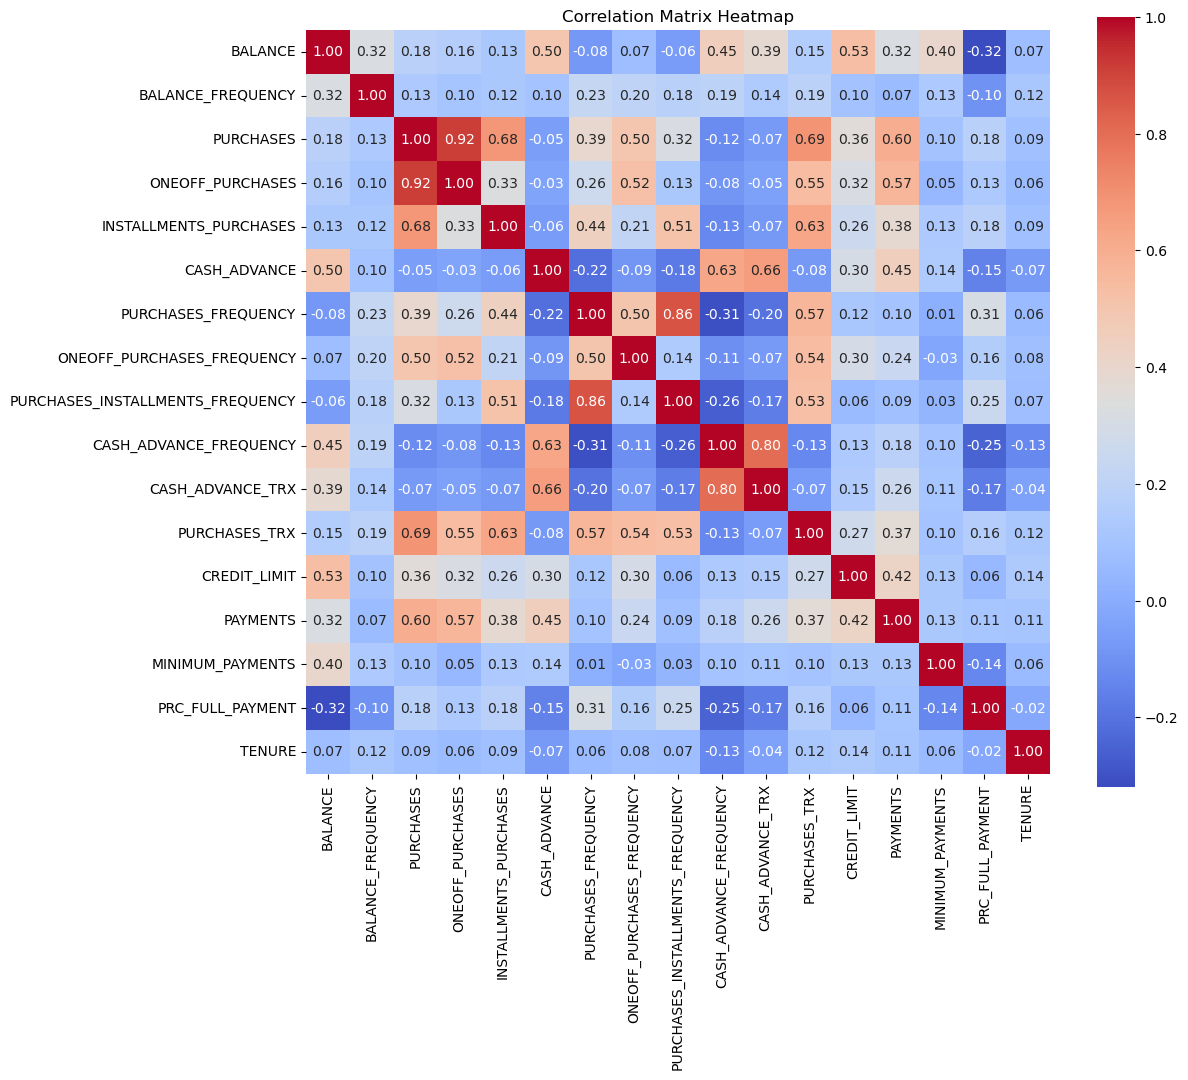

In [28]:
# Plot correlation matrix using heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [29]:
# Drop highly correlated features (example: drop 'ONEOFF_PURCHASES' due to high correlation with 'PURCHASES')
data_reduced = data_cleaned.drop(columns=['ONEOFF_PURCHASES', 'CASH_ADVANCE_FREQUENCY'])


# Q3: Dimensionality Reduction Using PCA

In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [34]:
# Standardize the numeric data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numeric_cols])

In [35]:
# Perform PCA to retain 95% variance
pca = PCA(0.95)
data_pca = pca.fit_transform(data_scaled)

In [36]:
# Print number of components that explain 95% variance
print(f'Number of components to retain 95% variance: {pca.n_components_}')

Number of components to retain 95% variance: 12


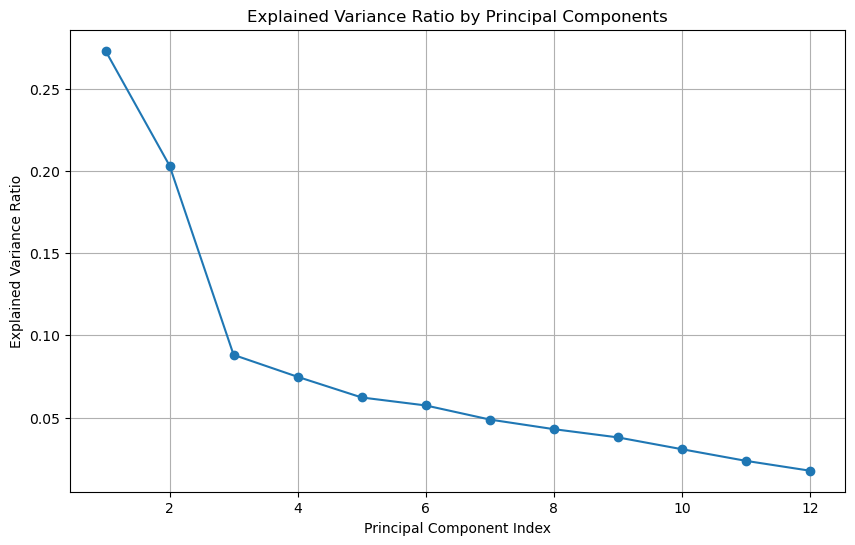

In [37]:
# Visualize explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

# Q4: Optimum Value of k for K-means Clustering Using Elbow Method

In [39]:
from sklearn.cluster import KMeans

In [40]:
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\choub\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\choub\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\choub\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\choub\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

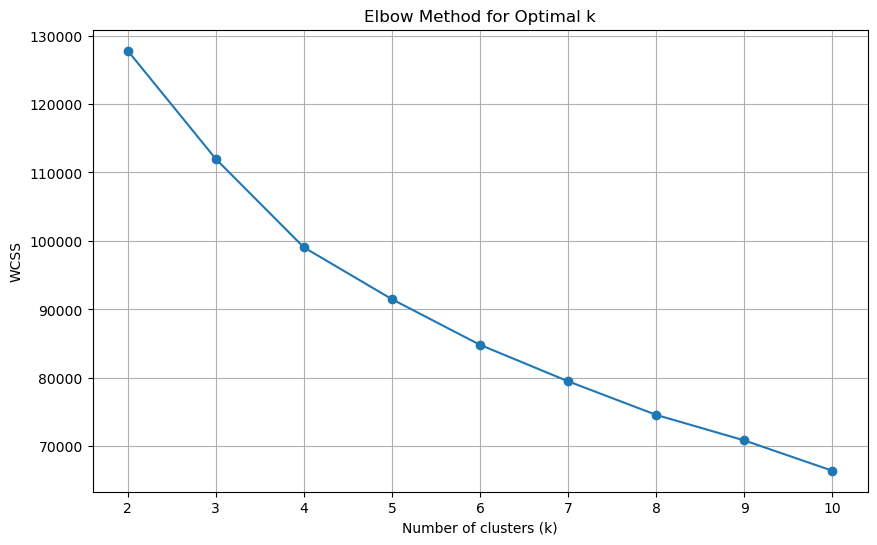

In [41]:
# Plot Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

Building K-means Model and Cluster Visualization

In [43]:
optimal_k = 4
kmeans_final = KMeans(n_clusters=optimal_k)
final_labels = kmeans_final.fit_predict(data_scaled)

C:\Users\choub\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


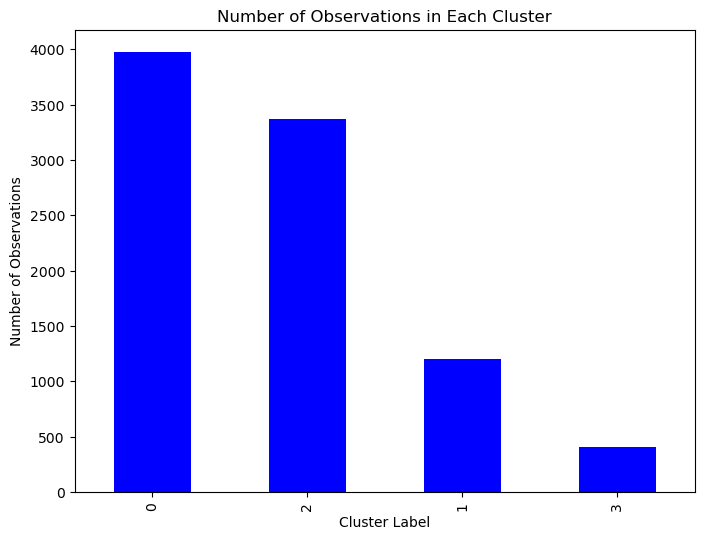

In [44]:
# Count observations in each cluster and plot them as a bar plot.
cluster_counts = pd.Series(final_labels).value_counts()

cluster_counts.plot(kind='bar', color='blue', figsize=(8,6))
plt.title('Number of Observations in Each Cluster')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Observations')
plt.show()


# Conclusion:

1. EDA revealed that most customers maintain low balances and make few purchases.
2. Missing values were handled by filling them with median values.
3. Outliers were removed using the Z-score method.
4. Highly correlated variables were dropped to avoid multicollinearity.
5. PCA reduced dimensionality while retaining 95% variance.
6. Using both the Elbow Method and Silhouette Score, we determined that k=4 is optimal for clustering.